In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# import the dataset as a DF
df = pd.read_csv(r'C:\Users\vande\OneDrive\Python\Machine Learning\Linear Regression\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# check for NA
df.isnull().values.any()

False

In [4]:
# data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


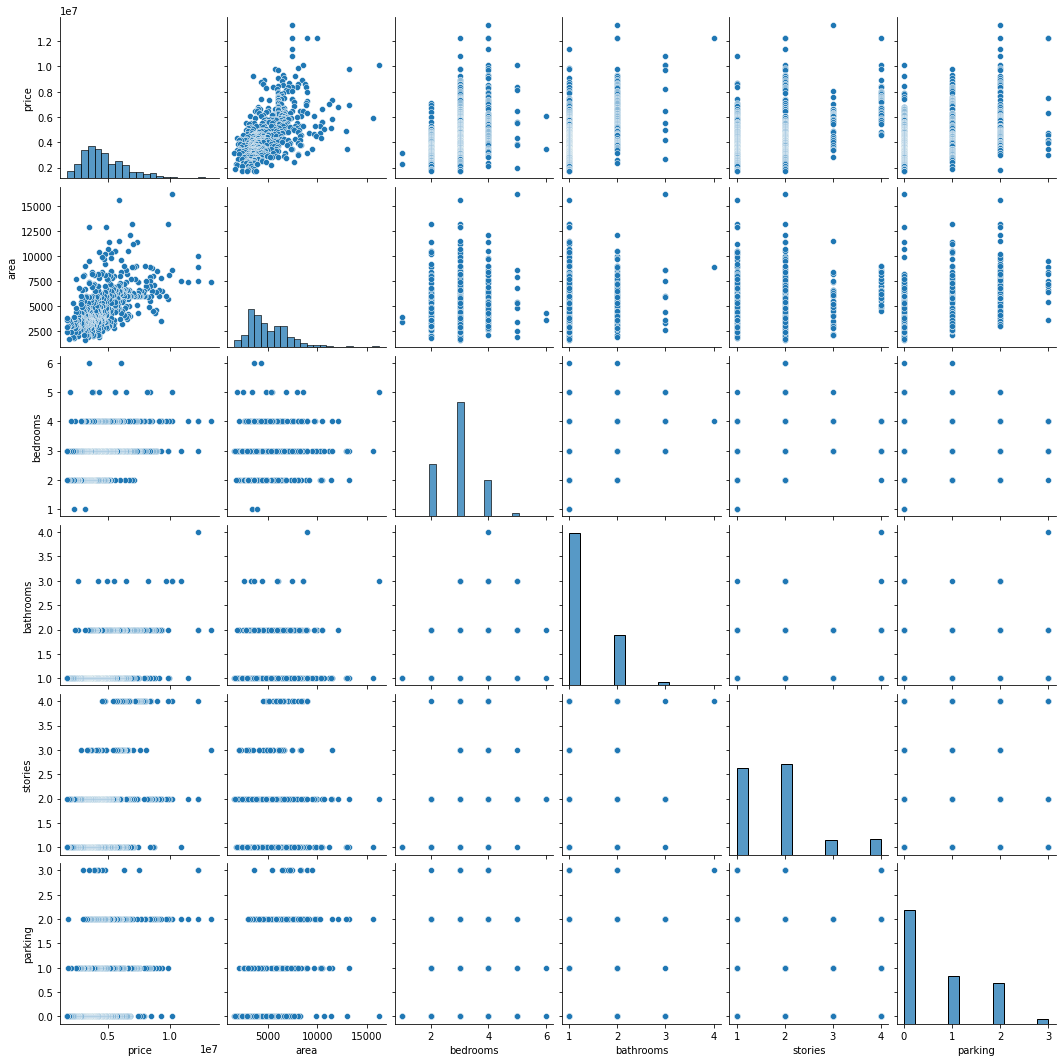

In [8]:
# plot the data
sns.pairplot(df)

In [6]:
df = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [7]:
df = df.sample(frac=1).reset_index(drop=True)

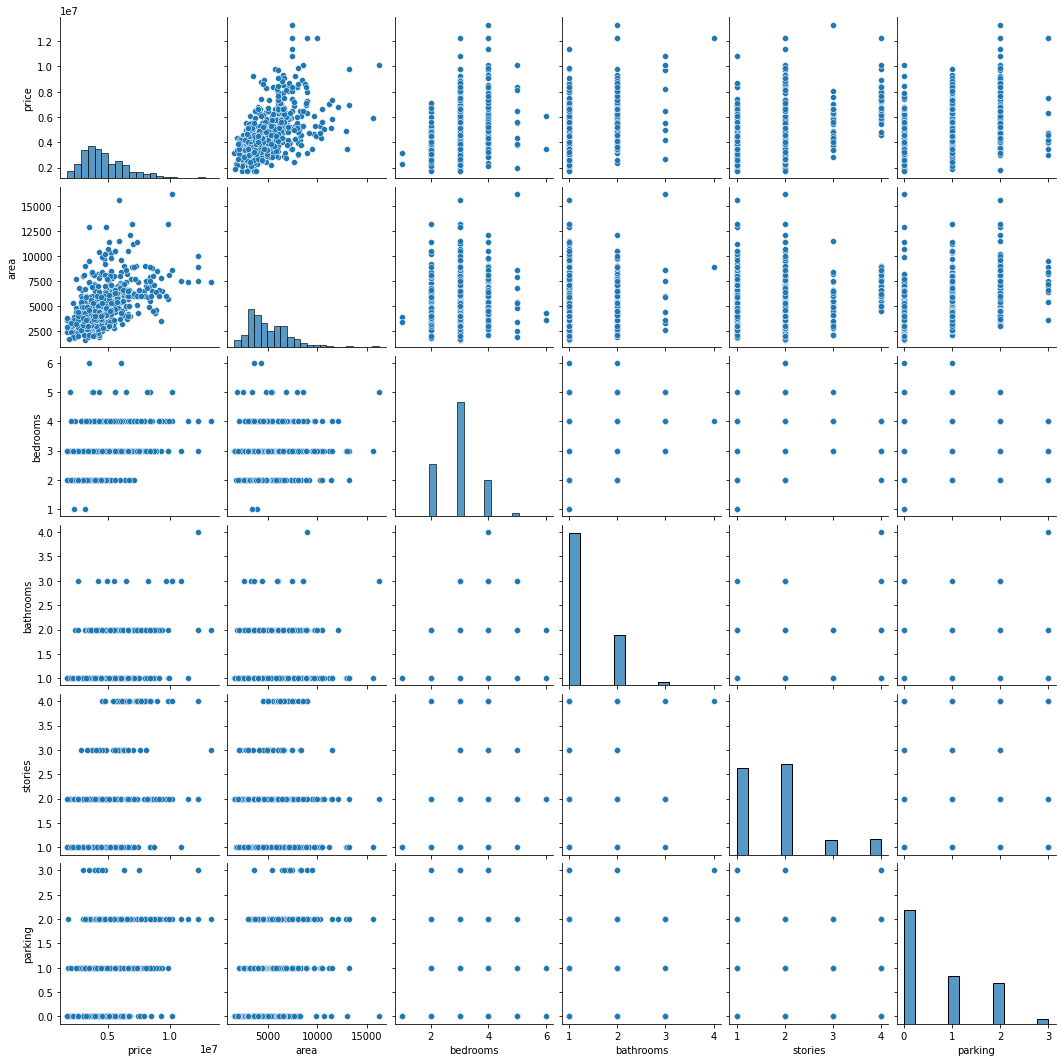

In [8]:
# plot the data (again)
sns.pairplot(df)

In [10]:
# split the data in the independent and dependent variables
x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

In [11]:
# split the data in a training and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [12]:
# define the model and train it....
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# print the coefficients
coeff_df = pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
coeff_df = coeff_df.apply(lambda x: '%.5f' % x, axis=1)
coeff_df

area             319.07851
bedrooms      118925.73512
bathrooms    1044003.51145
stories       629199.26183
parking       427118.56562
dtype: object

In [14]:
# use the model to make a prediction of the test data
predictions = model.predict(x_test)

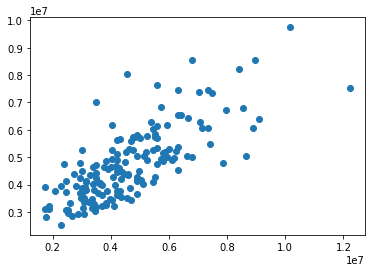

In [15]:
# check our work
plt.scatter(y_test, predictions)

We can see that linear regression is not a great tool for this dataset as it diverts significantly at higher values.

(array([ 2.,  5., 22., 50., 45., 30.,  5.,  2.,  2.,  1.]),
 array([-3501964.14530894, -2682941.36886476, -1863918.59242059,
        -1044895.81597641,  -225873.03953223,   593149.73691195,
         1412172.51335612,  2231195.2898003 ,  3050218.06624448,
         3869240.84268866,  4688263.61913284]),
 <BarContainer object of 10 artists>)

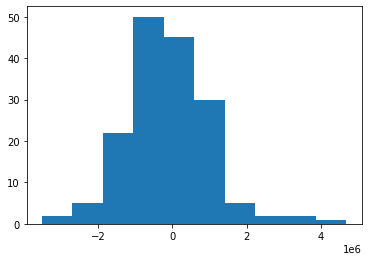

In [16]:
# another plot
plt.hist(y_test - predictions)

In [18]:
# check the mean absolute error
metrics.mean_absolute_error(y_test, predictions).round(2)

875076.78

In [19]:
# check the mean square error
metrics.mean_squared_error(y_test, predictions).round(2)

1342579925330.84

In [20]:
# check the root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, predictions)).round(2)

1158697.51

In [21]:
# Create the pandas DataFrame
new_data = {
            'area': 7240, 
            'bedrooms': 4, 
            'bathrooms': 2, 
            'stories': 3, 
            'parking': 2}

new_data_df = pd.DataFrame(new_data, index=[0])
new_data_df

,area,bedrooms,bathrooms,stories,parking
0,7240,4,2,3,2


In [22]:
# new prediction
new_prediction = model.predict(new_data_df)
print(new_prediction)

[7645856.66564256]
